# Case Study on Correlation and Regression

###### A textile company regularly spent money on five advertising companies for their ads. The dataset is 'Add_sales_data_2018.csv'.

###### 1. Check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

###### 2. Build a regression model to predict the profit from the given data and comment your findings on it.

###### 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

Add1(in Thousands): 290

Add2(in Thousands): 312

Add3(in Thousands): 309

Add4(in Thousands): 298

Add5(in Thousands): 320

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ad_data = pd.read_csv(r'C:\Users\Dell\Downloads\Add_sales_data_2018.csv')

In [3]:
ad_data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [4]:
ad_data.shape

(205, 7)

In [5]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [6]:
ad_data.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [7]:
ad_data.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


### 1. Check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

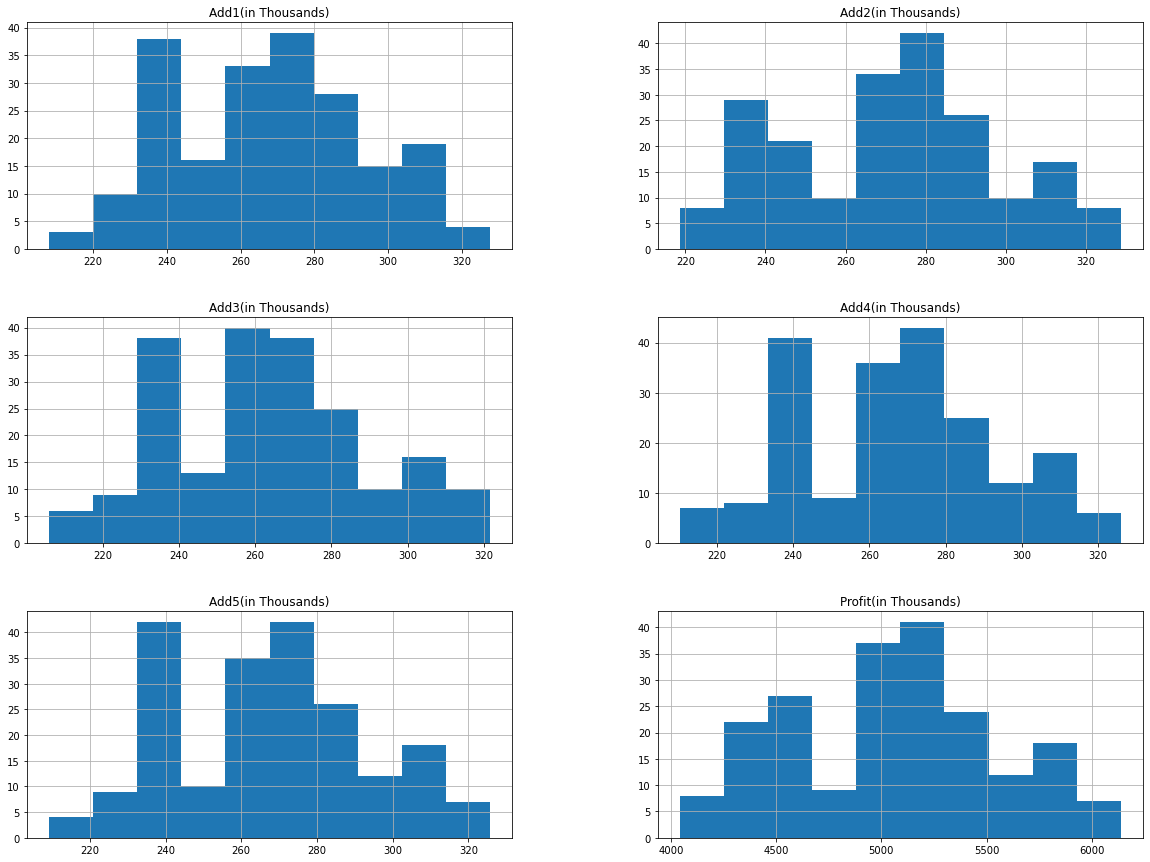

In [8]:
freqgraph = ad_data.select_dtypes(include=['int32','int64','float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [9]:
corrmatrix = ad_data.corr()
corrmatrix

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


<AxesSubplot:>

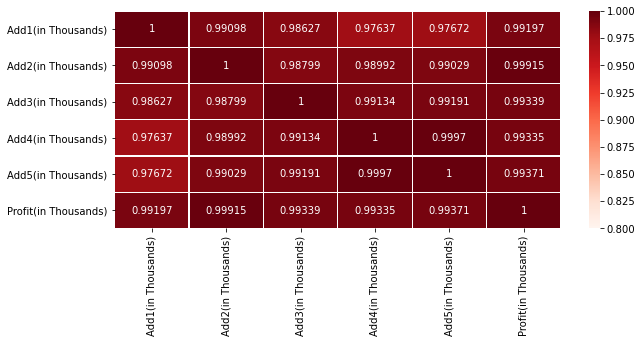

In [10]:
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix, fmt='.5g', vmin = .8, vmax = 1, annot = True, linewidth = 0.2, cmap='Reds')

#### Insights:

All the histograms plotted are almost similiar which indicates that there is not much difference between the amount
spent for ads for all the 5 companies. 

It is clear from the correlation matrix that the each of the variables in the dataset are highly correlated with a correlation coefficient ranging from 0.9 to 1

Also, all of the independent variables are highly correlated to the target variable, that is Profit(in Thousands).

### 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [11]:
data1=ad_data.drop(['Date'],axis=1)

In [12]:
y=data1['Profit(in Thousands)']

In [13]:
X=data1.drop(['Profit(in Thousands)'],axis=1)

In [14]:
X.shape

(205, 5)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=55,test_size=0.2)

In [16]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [17]:
model = lr.fit(X_train,y_train)

In [18]:
predictions = model.predict(X_test)

In [19]:
print(y_test)

81     5027.633
120    5182.368
191    5780.799
131    4968.030
129    5140.372
194    5717.838
184    5962.336
22     4523.704
192    5767.839
53     4605.783
79     5013.207
185    5903.253
127    5188.139
173    5805.521
186    5861.830
157    5263.935
92     4763.690
57     5071.736
101    5421.940
26     4451.999
104    5518.561
15     4152.066
187    5890.012
87     5058.140
145    5108.626
139    5300.437
118    5318.100
160    5387.438
27     4453.773
76     5225.140
183    5972.337
164    4997.719
64     5239.060
134    4934.682
156    5137.534
153    5019.997
203    5565.444
34     4461.325
68     5004.282
116    5395.217
172    5789.791
Name: Profit(in Thousands), dtype: float64


In [23]:
print(predictions)

[5027.633 5182.368 5780.799 4968.03  5140.372 5717.838 5962.336 4523.704
 5767.839 4605.783 5013.207 5903.253 5188.139 5805.521 5861.83  5263.935
 4763.69  5071.736 5421.94  4451.999 5518.561 4152.066 5890.012 5058.14
 5108.626 5300.437 5318.1   5387.438 4453.773 5225.14  5972.337 4997.719
 5239.06  4934.682 5137.534 5019.997 5565.444 4461.325 5004.282 5395.217
 5789.791]


In [21]:
from sklearn.metrics import mean_squared_error
print('MSE is', mean_squared_error(y_test,predictions))

MSE is 2.622767795899844e-25


#### Insights

Analysing the predicted vales of y with the actual values, it seems that the values are almost the same even to the decimal places.

Mean Squared Error is obtained as 2.622767795899844e-25, which means that the the model is highly accurate comparing the predicted values and actual values.

### 3. Predict the profit generated by the company using the given values

In [22]:
make_predict = [[290,312,309,298,320]]
model.predict(make_predict).item()

5820.0599999999995

#### Insights

The profit amount generated for the given spends (290,312,309,298,320) is 5820.0599999999995